In [2]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sympy as syms
import math

N=50
x_start,x_end = -2.0,2.0
y_start,y_end =-1.0,1.0
x = np.linspace(x_start,x_end,N)
y=np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [3]:
gam = 5.0
x_vor, y_vor = 0.0,0.0



In [4]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

In [5]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [6]:
u_vor,v_vor = get_velocity_vortex(gam,x_vor,y_vor,X,Y)
psi_vor = get_stream_function_vortex(gam,x_vor,y_vor,X,Y)

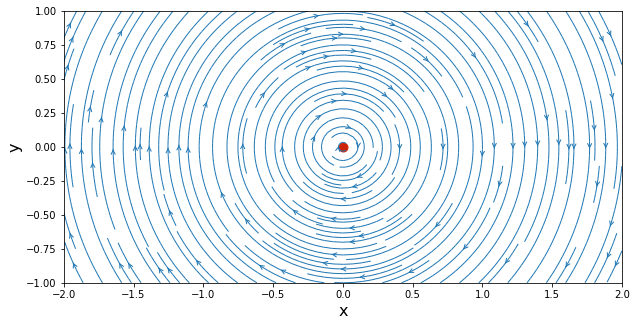

In [7]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_vor, v_vor,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vor, y_vor, color='#CD2305', s=80, marker='o');

In [8]:
strength_sink = -1.0
x_sink, y_sink = 0.0,0.0

def get_velocity_sink(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * math.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * math.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [9]:
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink,y_sink,X,Y)
u = u_sink + u_vor
v = v_sink+v_vor


In [10]:
def get_stream_function_sink(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * math.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

In [11]:
psi_sink = get_stream_function_sink(strength_sink, x_sink,y_sink,X,Y)
psi =psi_sink + psi_vor


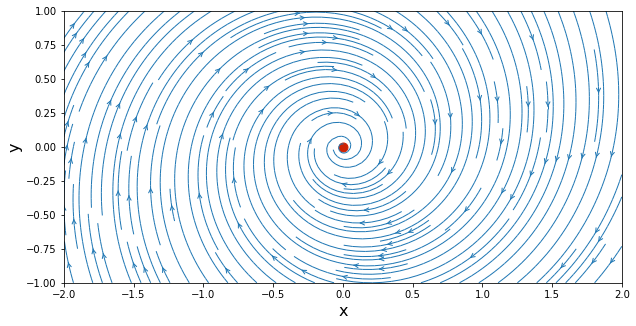

In [12]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vor, y_vor, color='#CD2305', s=80, marker='o');

In [13]:
x_vortex_inf = np.linspace(-2,2,17)
y_vortex_inf = np.zeros((17,1),dtype=float)
gam_vor_inf = np.ones((17,1),dtype=float)




In [14]:
U_vor_inf = 0
V_vor_inf = 0
for i in range(0,17):
    u_vor_inf,v_vor_inf = get_velocity_vortex(gam_vor_inf[i],x_vortex_inf[i],y_vortex_inf[i],X,Y)
    U_vor_inf += u_vor_inf
    V_vor_inf += v_vor_inf
    
    

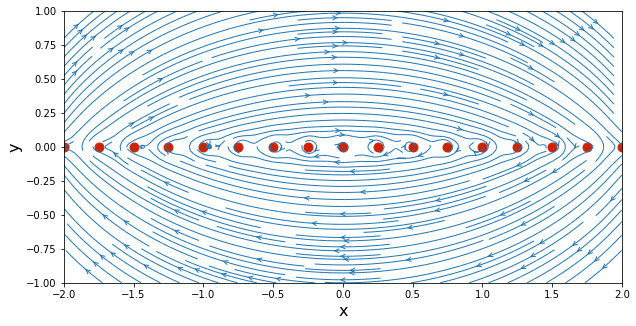

In [15]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, U_vor_inf, V_vor_inf, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex_inf, y_vortex_inf, color='#CD2305', s=80, marker='o');

In [16]:
gam_sin = 1.0
a = 0.25
u_sin= (gam_sin*np.sinh(2*math.pi*Y/a))/(2*a*(np.cosh(2*math.pi*Y/a)-np.cos(2*math.pi*X/2)))
                                         

v_sin= -(gam_sin*np.sin(2*math.pi*X/a))/(2*a*(np.cosh(2*math.pi*Y/a)-np.cos(2*math.pi*X/2)))

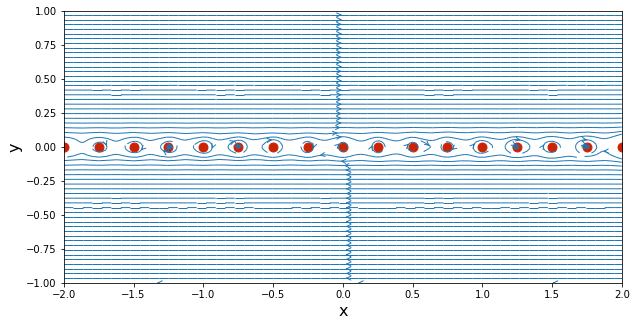

In [17]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_sin, v_sin, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex_inf, y_vortex_inf, color='#CD2305', s=80, marker='o');


In [18]:
kappa = 1.0
x_doublet, y_doublet=0.0,0.0
u_inf = 1.0


In [21]:
def get_velocity_doublet(strength, xd,yd, X,Y):
    u = (-strength/(2*math.pi)*
        ((X-xd)**2-(Y-yd)**2)/
        ((X-xd)**2 + (Y-yd)**2)**2)
    v = (-strength/(2*math.pi)*2*
        (X-xd)*(Y-yd)/ ((X-xd)**2 + (Y-yd)**2)**2)
    return u,v

def get_stream_function_doublet(strength, xd,yd,X,Y):
    psi = -strength /(2*math.pi)*(Y-yd)/((X-xd)**2 +(Y-yd)**2)
    return psi

u_doublet, v_doublet = get_velocity_doublet(kappa,x_doublet, y_doublet, X,Y)
psi_doublet = get_stream_function_doublet(kappa,x_doublet, y_doublet, X,Y)
u_freestream = u_inf * np.ones((N,N),dtype=float)
v_freestream = np.zeros((N,N), dtype=float)
psi_freestream = u_inf*Y
u = u_freestream +u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet


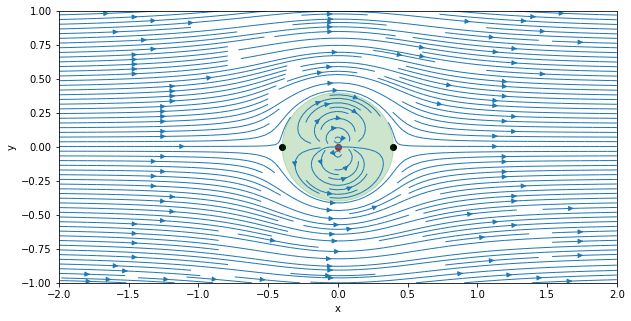

In [33]:
width = 10
height = (y_end - y_start)/ (x_end-x_start)*width
plt.figure(figsize=(width,height))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u,v,density=2, linewidth =1, arrowsize=1)
plt.scatter(x_doublet, y_doublet, color ='red')

#find circle radius
R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = plt.Circle((0,0),radius=R, color ='green', alpha= 0.2)
plt.gca().add_patch(circle)

#stagnation points added to figure
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf)),0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf)),0.0
plt.scatter([x_stagn1,x_stagn2],[y_stagn1,y_stagn2],color='black')

In [50]:
gamma =4.0
x_vortex,y_vortex = 0.0,0.0

def get_velocity_vortex(strength,xv,yv,X,Y):

   
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    return u,v

def get_stream_function_vortex(strength,xv,yv,X,Y):
    psi =strength/(4*math.pi)*np.log((X-xv)**2 + (Y-yv)**2)
    return psi

u_vor, v_vor =get_velocity_vortex(gamma, x_vortex,y_vortex,X,Y)
psi_vor = get_stream_function_vortex(gamma,x_vortex,y_vortex, X,Y)

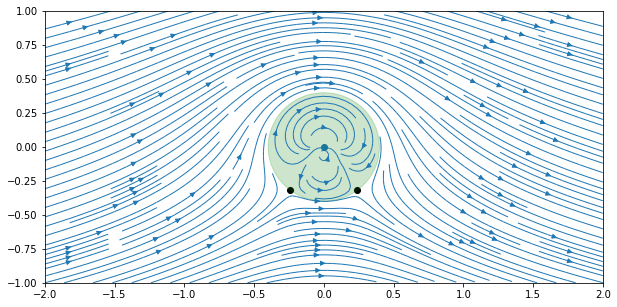

In [51]:
u = u_freestream + u_doublet+ u_vor
v = v_freestream+ v_doublet+v_vor
psi = psi_freestream + psi_doublet + psi_vor

plt.figure(figsize=(width,height))
plt.streamplot(X,Y,u,v,density=2, linewidth=1, arrowsize =1)
circle = plt.Circle((0,0),radius=R, color ='green', alpha= 0.2)
plt.gca().add_patch(circle)
plt.scatter(x_vortex,y_vortex)
x_stagn1, y_stagn1 = (+math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))
x_stagn2, y_stagn2 = (-math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))

plt.scatter([x_stagn1,x_stagn2],[y_stagn1,y_stagn2],color='black')

In [54]:
y_stagn1


-0.3183098861837907

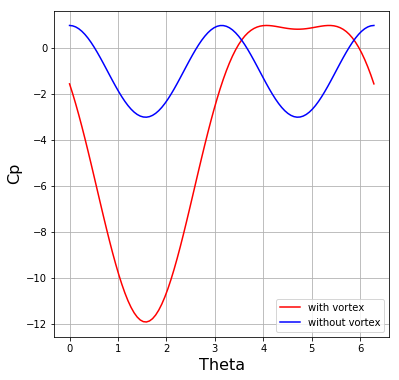

In [64]:
theta = np.linspace(0.0,2*math.pi,100)
u_theta = -2*u_inf*np.sin(theta) -gamma/(2*math.pi*R)
cp=1.0 - (u_theta/u_inf)**2
u_theta_no_vortex = -2*u_inf*np.sin(theta)
cp_no_vortex =1.0 - (u_theta_no_vortex/u_inf)**2
size = 6
plt.figure(figsize=(size,size))
plt.grid(True)
plt.plot(theta,cp,color='red', label='with vortex')
plt.plot(theta,cp_no_vortex,color='blue', label= 'without vortex')
plt.xlabel('Theta',fontsize=16)
plt.ylabel('Cp',fontsize=16)

plt.legend(loc='lower right')